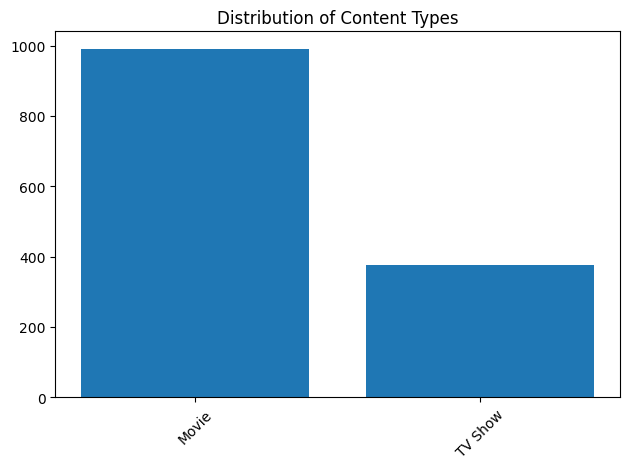

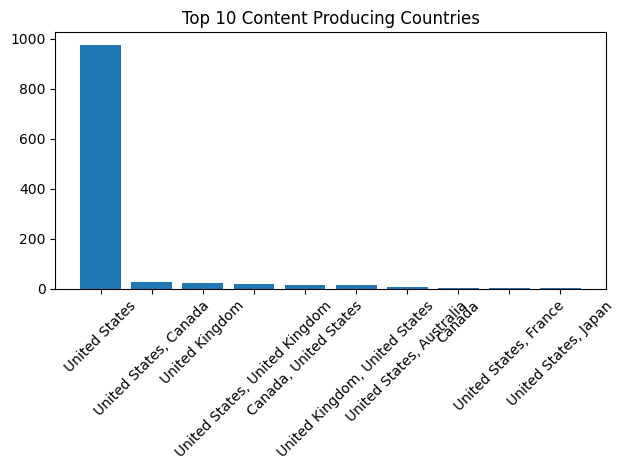

<ipython-input-10-385493d40089>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_additions = df.resample('M', on='date')['title'].count()


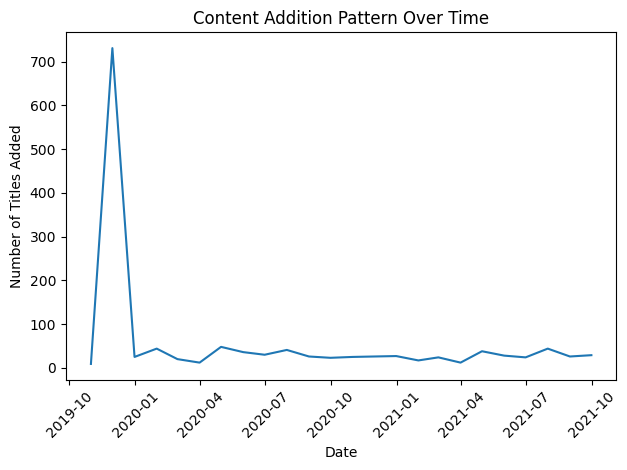

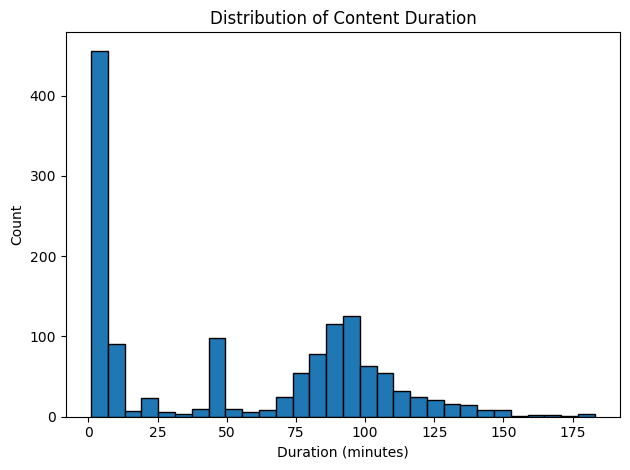

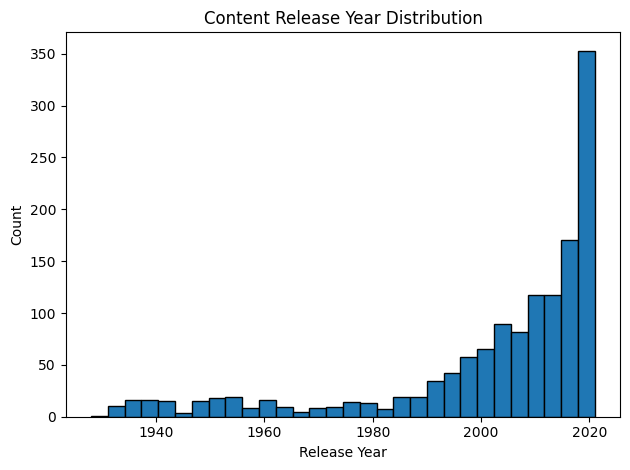

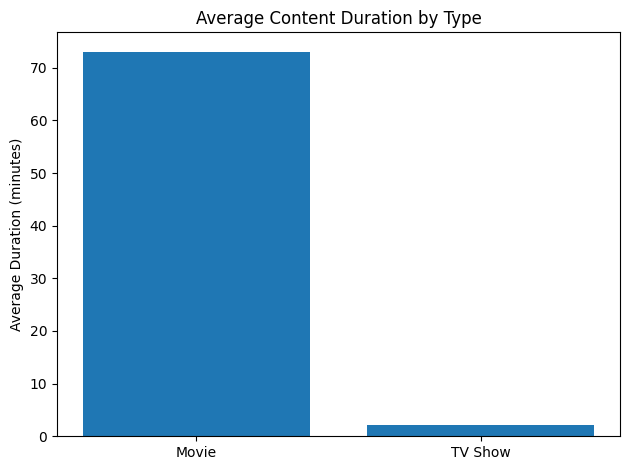

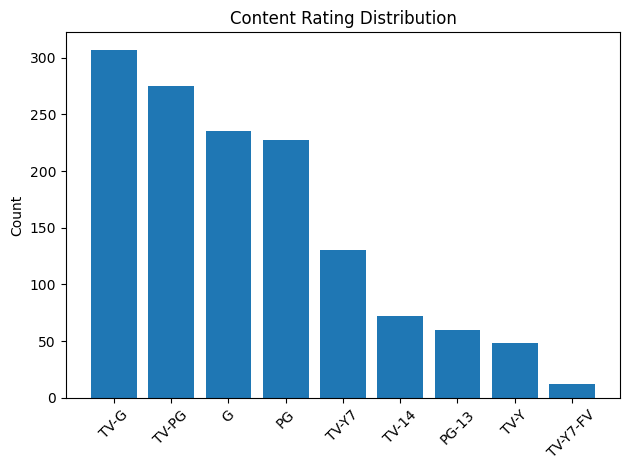


Key Insights:
Total number of titles: 1368
Unique titles: 1368

Most common rating: TV-G
Average movie duration: 73.08 minutes

Most recent addition: September 2021
Most common content type: Movie
Year range: 1928 to 2021


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Read the data
df = pd.read_csv('disney_plus_titles.csv')

# 1. Data Cleaning
def clean_data(df):
    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date_added'])
    
    # Extract duration in minutes as numeric using proper regex
    df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)
    
    # Clean type column
    df['type'] = df['type'].fillna('Unknown')
    
    return df

def analyze_viewing_patterns(df):

    plt.figure
    type_counts = df['type'].value_counts()
    plt.bar(type_counts.index, type_counts.values)
    plt.title('Distribution of Content Types')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

   
    plt.figure
    country_counts = df['country'].value_counts().head(10)
    plt.bar(range(len(country_counts)), country_counts.values)
    plt.xticks(range(len(country_counts)), country_counts.index, rotation=45)
    plt.title('Top 10 Content Producing Countries')
    plt.tight_layout()
    plt.show()

   
    plt.figure
    monthly_additions = df.resample('M', on='date')['title'].count()
    plt.plot(monthly_additions.index, monthly_additions.values)
    plt.title('Content Addition Pattern Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Titles Added')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    
    plt.figure
    plt.hist(df['duration_mins'].dropna(), bins=30, edgecolor='black')
    plt.title('Distribution of Content Duration')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure
    plt.hist(df['release_year'].dropna(), bins=30, edgecolor='black')
    plt.title('Content Release Year Distribution')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure
    duration_by_type = df.groupby('type')['duration_mins'].mean()
    plt.bar(duration_by_type.index, duration_by_type.values)
    plt.title('Average Content Duration by Type')
    plt.ylabel('Average Duration (minutes)')
    plt.tight_layout()
    plt.show()

    
    plt.figure
    rating_counts = df['rating'].value_counts()
    plt.bar(range(len(rating_counts)), rating_counts.values)
    plt.xticks(range(len(rating_counts)), rating_counts.index, rotation=45)
    plt.title('Content Rating Distribution')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def print_insights(df):
    print("\nKey Insights:")
    print(f"Total number of titles: {len(df)}")
    print(f"Unique titles: {df['title'].nunique()}")
    print(f"\nMost common rating: {df['rating'].mode()[0]}")
    print(f"Average movie duration: {df[df['type']=='Movie']['duration_mins'].mean():.2f} minutes")
    print(f"\nMost recent addition: {df['date'].max().strftime('%B %Y')}")
    print(f"Most common content type: {df['type'].mode()[0]}")
    print(f"Year range: {df['release_year'].min()} to {df['release_year'].max()}")

def main():
    df = pd.read_csv('disney_plus_titles.csv')
    df = clean_data(df)
    
    analyze_viewing_patterns(df)
    print_insights(df)

if __name__ == "__main__":
    main()